<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/_BP_hv3_4(2)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 128
epochs = 300
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4096      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
1319/1319 [==============================] - 45s 34ms/step - loss: 10277.4111 - val_loss: 8285.3135
Epoch 2/300
1319/1319 [==============================] - 41s 31ms/step - loss: 3377.9248 - val_loss: 1001.0939
Epoch 3/300
1319/1319 [==============================] - 45s 34ms/step - loss: 300.9760 - val_loss: 150.0457
Epoch 4/300
1319/1319 [==============================] - 45s 34ms/step - loss: 138.6676 - val_loss: 207.0417
Epoch 5/300
1319/1319 [==============================] - 41s 31ms/step - loss: 125.4987 - val_loss: 123.2754
Epoch 6/300
1319/1319 [==============================] - 25s 19ms/step - loss: 113.1460 - val_loss: 137.7837
Epoch 7/300
1319/1319 [==============================] - 18s 14ms/step - loss: 110.0886 - val_loss: 158.6056
Epoch 8/300
1319/1319 [==============================] - 18s 14ms/step - loss: 102.7875 - val_loss: 147.6842
Epoch 9/300
1319/1319 [==============================] - 18s 14ms/step - loss: 99.3465 - val_loss: 106.7581
Epoch 10/300
13

1319/1319 [==============================] - 18s 14ms/step - loss: 73.1749 - val_loss: 88.9752
Epoch 77/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.8897 - val_loss: 90.5258
Epoch 78/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.8489 - val_loss: 125.4957
Epoch 79/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.4533 - val_loss: 158.8855
Epoch 80/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.6116 - val_loss: 92.6863
Epoch 81/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.3599 - val_loss: 93.1322
Epoch 82/300
1319/1319 [==============================] - 18s 14ms/step - loss: 71.8698 - val_loss: 111.2091
Epoch 83/300
1319/1319 [==============================] - 18s 14ms/step - loss: 71.5522 - val_loss: 99.3885
Epoch 84/300
1319/1319 [==============================] - 18s 14ms/step - loss: 72.2841 - val_loss: 115.0617
Epoch 85/300
1319/1319 [=============

1319/1319 [==============================] - 18s 14ms/step - loss: 68.1256 - val_loss: 113.5141
Epoch 152/300
1319/1319 [==============================] - 18s 14ms/step - loss: 68.8416 - val_loss: 88.1411
Epoch 153/300
1319/1319 [==============================] - 18s 14ms/step - loss: 68.0045 - val_loss: 89.4111
Epoch 154/300
1319/1319 [==============================] - 18s 14ms/step - loss: 68.8830 - val_loss: 100.7325
Epoch 155/300
1319/1319 [==============================] - 9s 7ms/step - loss: 68.9712 - val_loss: 185.7653
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 68.2671 - val_loss: 95.9560
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 68.4560 - val_loss: 95.9484
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 69.1657 - val_loss: 90.5365
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 68.2742 - val_loss: 90.3777
Epoch 160/300
1319/1319 [===============

1319/1319 [==============================] - 8s 6ms/step - loss: 66.1809 - val_loss: 91.9231
Epoch 228/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.2355 - val_loss: 114.2272
Epoch 229/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.6223 - val_loss: 90.7654
Epoch 230/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.7980 - val_loss: 98.8377
Epoch 231/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.8971 - val_loss: 89.8849
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.6412 - val_loss: 92.7377
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.8625 - val_loss: 93.4079
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.7097 - val_loss: 84.4150
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 65.7876 - val_loss: 94.1118
Epoch 236/300
1319/1319 [=========================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -3.310510407337586 
MAE:  7.611199105292496 
SD:  9.352249177696613


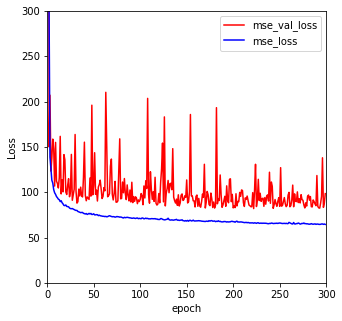

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)                128       
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32)                128       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
1319/1319 [==============================] - 8s 6ms/step - loss: 10695.3643 - val_loss: 7311.4482
Epoch 2/300
1319/1319 [==============================] - 8s 6ms/step - loss: 4335.1187 - val_loss: 1480.5641
Epoch 3/300
1319/1319 [==============================] - 8s 6ms/step - loss: 638.9699 - val_loss: 268.0805
Epoch 4/300
1319/1319 [==============================] - 8s 6ms/step - loss: 137.3043 - val_loss: 152.8720
Epoch 5/300
1319/1319 [==============================] - 8s 6ms/step - loss: 118.3697 - val_loss: 147.1579
Epoch 6/300
1319/1319 [==============================] - 8s 6ms/step - loss: 113.1580 - val_loss: 223.8670
Epoch 7/300
1319/1319 [==============================] - 8s 6ms/step - loss: 105.3012 - val_loss: 139.5678
Epoch 8/300
1319/1319 [==============================] - 8s 6ms/step - loss: 100.6204 - val_loss: 125.6983
Epoch 9/300
1319/1319 [==============================] - 8s 6ms/step - loss: 97.1879 - val_loss: 124.0032
Epoch 10/300
1319/1319 [=========

1319/1319 [==============================] - 8s 6ms/step - loss: 67.3227 - val_loss: 109.8207
Epoch 78/300
1319/1319 [==============================] - 8s 6ms/step - loss: 67.1532 - val_loss: 85.9908
Epoch 79/300
1319/1319 [==============================] - 8s 6ms/step - loss: 67.1351 - val_loss: 87.7097
Epoch 80/300
1319/1319 [==============================] - 8s 6ms/step - loss: 67.0105 - val_loss: 103.5579
Epoch 81/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.8720 - val_loss: 101.5979
Epoch 82/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.6361 - val_loss: 86.7890
Epoch 83/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.6895 - val_loss: 87.4879
Epoch 84/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.6807 - val_loss: 88.0069
Epoch 85/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.7293 - val_loss: 84.2806
Epoch 86/300
1319/1319 [==============================] 

Epoch 154/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.2844 - val_loss: 98.5218
Epoch 155/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.3721 - val_loss: 89.4982
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.4966 - val_loss: 107.0582
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.1341 - val_loss: 92.7768
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.2385 - val_loss: 92.2416
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.1966 - val_loss: 88.8530
Epoch 160/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.3146 - val_loss: 83.1041
Epoch 161/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.2524 - val_loss: 89.1246
Epoch 162/300
1319/1319 [==============================] - 8s 6ms/step - loss: 63.1326 - val_loss: 84.2586
Epoch 163/300
1319/1319 [===========

1319/1319 [==============================] - 8s 6ms/step - loss: 61.6562 - val_loss: 106.5144
Epoch 231/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.8274 - val_loss: 85.3896
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.6221 - val_loss: 89.7076
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.4837 - val_loss: 82.0827
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.6431 - val_loss: 93.4488
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.7034 - val_loss: 82.6064
Epoch 236/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.7042 - val_loss: 97.9544
Epoch 237/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.6408 - val_loss: 88.1677
Epoch 238/300
1319/1319 [==============================] - 8s 6ms/step - loss: 61.8010 - val_loss: 87.7337
Epoch 239/300
1319/1319 [=========================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.9548241730708869 
MAE:  6.879272194520557 
SD:  9.278426303177406


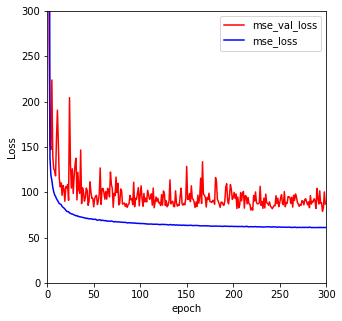

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32)                128       
_________________________________________________________________
activation_22 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)                128       
_________________________________________________________________
activation_23 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/300
1319/1319 [==============================] - 8s 6ms/step - loss: 10554.3594 - val_loss: 7138.0317
Epoch 2/300
1319/1319 [==============================] - 8s 6ms/step - loss: 3632.3723 - val_loss: 773.4019
Epoch 3/300
1319/1319 [==============================] - 8s 6ms/step - loss: 383.1566 - val_loss: 128.2645
Epoch 4/300
1319/1319 [==============================] - 8s 6ms/step - loss: 117.9918 - val_loss: 1043.1552
Epoch 5/300
1319/1319 [==============================] - 8s 6ms/step - loss: 108.9534 - val_loss: 128.7829
Epoch 6/300
1319/1319 [==============================] - 8s 6ms/step - loss: 102.1006 - val_loss: 201.2568
Epoch 7/300
1319/1319 [==============================] - 8s 6ms/step - loss: 99.3700 - val_loss: 145.2899
Epoch 8/300
1319/1319 [==============================] - 8s 6ms/step - loss: 95.7730 - val_loss: 123.4271
Epoch 9/300
1319/1319 [==============================] - 8s 6ms/step - loss: 93.1045 - val_loss: 113.9752
Epoch 10/300
1319/1319 [===========

1319/1319 [==============================] - 9s 6ms/step - loss: 70.5947 - val_loss: 135.1928
Epoch 78/300
1319/1319 [==============================] - 8s 6ms/step - loss: 70.1763 - val_loss: 97.4447
Epoch 79/300
1319/1319 [==============================] - 8s 6ms/step - loss: 71.1889 - val_loss: 89.9457
Epoch 80/300
1319/1319 [==============================] - 8s 6ms/step - loss: 70.1791 - val_loss: 106.2137
Epoch 81/300
1319/1319 [==============================] - 8s 6ms/step - loss: 70.4521 - val_loss: 105.1698
Epoch 82/300
1319/1319 [==============================] - 8s 6ms/step - loss: 70.1781 - val_loss: 159.9357
Epoch 83/300
1319/1319 [==============================] - 8s 6ms/step - loss: 69.7217 - val_loss: 81.6670
Epoch 84/300
1319/1319 [==============================] - 8s 6ms/step - loss: 69.9112 - val_loss: 86.9421
Epoch 85/300
1319/1319 [==============================] - 8s 6ms/step - loss: 70.0952 - val_loss: 98.6616
Epoch 86/300
1319/1319 [==============================]

1319/1319 [==============================] - 8s 6ms/step - loss: 66.7359 - val_loss: 87.1203
Epoch 154/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.8296 - val_loss: 85.7890
Epoch 155/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.4595 - val_loss: 83.3837
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.2357 - val_loss: 90.5580
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.3763 - val_loss: 85.8642
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.0991 - val_loss: 81.6359
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.4944 - val_loss: 83.1264
Epoch 160/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.4315 - val_loss: 91.7148
Epoch 161/300
1319/1319 [==============================] - 8s 6ms/step - loss: 66.0361 - val_loss: 81.2594
Epoch 162/300
1319/1319 [==========================

1319/1319 [==============================] - 8s 6ms/step - loss: 65.0562 - val_loss: 99.9995
Epoch 230/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.6891 - val_loss: 100.3490
Epoch 231/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.9896 - val_loss: 85.4263
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.4472 - val_loss: 151.2611
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.5918 - val_loss: 84.8455
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.4450 - val_loss: 99.2200
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.4897 - val_loss: 87.8272
Epoch 236/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.4139 - val_loss: 94.5974
Epoch 237/300
1319/1319 [==============================] - 8s 6ms/step - loss: 64.5084 - val_loss: 108.1172
Epoch 238/300
1319/1319 [=======================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -4.426956547406521 
MAE:  8.140570949094036 
SD:  9.35753707410751


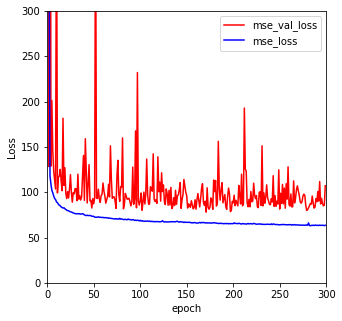

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -2.2608809272244064 
Ensemble_std:  9.329404184993843


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32)                128       
_________________________________________________________________
activation_33 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32)                128       
_________________________________________________________________
activation_34 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
1319/1319 [==============================] - 9s 6ms/step - loss: 2790.3936 - val_loss: 1148.1448
Epoch 2/300
1319/1319 [==============================] - 8s 6ms/step - loss: 442.0314 - val_loss: 79.0994
Epoch 3/300
1319/1319 [==============================] - 8s 6ms/step - loss: 56.7679 - val_loss: 145.8382
Epoch 4/300
1319/1319 [==============================] - 8s 6ms/step - loss: 46.4090 - val_loss: 43.2232
Epoch 5/300
1319/1319 [==============================] - 8s 6ms/step - loss: 42.2761 - val_loss: 71.4177
Epoch 6/300
1319/1319 [==============================] - 9s 6ms/step - loss: 39.3785 - val_loss: 58.9052
Epoch 7/300
1319/1319 [==============================] - 8s 6ms/step - loss: 37.0796 - val_loss: 83.4480
Epoch 8/300
1319/1319 [==============================] - 9s 6ms/step - loss: 35.9136 - val_loss: 54.6836
Epoch 9/300
1319/1319 [==============================] - 8s 6ms/step - loss: 35.0205 - val_loss: 48.7934
Epoch 10/300
1319/1319 [=========================

1319/1319 [==============================] - 8s 6ms/step - loss: 26.2498 - val_loss: 40.8793
Epoch 79/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.2237 - val_loss: 41.4526
Epoch 80/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.5617 - val_loss: 36.8743
Epoch 81/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.5297 - val_loss: 34.9320
Epoch 82/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.1260 - val_loss: 38.1757
Epoch 83/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.4274 - val_loss: 34.2813
Epoch 84/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.2415 - val_loss: 40.1429
Epoch 85/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.0810 - val_loss: 34.2192
Epoch 86/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.1706 - val_loss: 44.9586
Epoch 87/300
1319/1319 [==============================] - 8

Epoch 155/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9361 - val_loss: 46.2010
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0324 - val_loss: 35.8240
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0666 - val_loss: 32.8344
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0550 - val_loss: 39.4636
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9323 - val_loss: 33.0540
Epoch 160/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9144 - val_loss: 36.1767
Epoch 161/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.8543 - val_loss: 36.7388
Epoch 162/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.8387 - val_loss: 34.7094
Epoch 163/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0281 - val_loss: 39.4920
Epoch 164/300
1319/1319 [============

1319/1319 [==============================] - 8s 6ms/step - loss: 24.2453 - val_loss: 32.7289
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2566 - val_loss: 32.6009
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.1704 - val_loss: 37.4549
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2739 - val_loss: 32.8309
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2991 - val_loss: 36.8599
Epoch 236/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2818 - val_loss: 31.7492
Epoch 237/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2715 - val_loss: 31.5273
Epoch 238/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.1696 - val_loss: 36.8172
Epoch 239/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.1542 - val_loss: 30.7360
Epoch 240/300
1319/1319 [==========================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.4900018521798971 
MAE:  4.134804705655306 
SD:  5.591589302393729


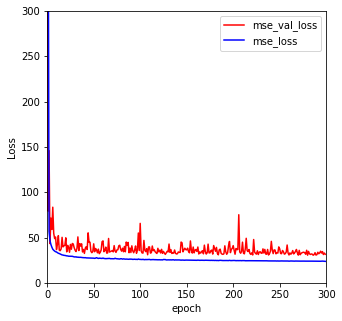

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_44 (Batc (None, 32)                128       
_________________________________________________________________
activation_44 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_45 (Batc (None, 32)                128       
_________________________________________________________________
activation_45 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
1319/1319 [==============================] - 8s 6ms/step - loss: 2581.5879 - val_loss: 968.7616
Epoch 2/300
1319/1319 [==============================] - 8s 6ms/step - loss: 285.7541 - val_loss: 98.2514
Epoch 3/300
1319/1319 [==============================] - 8s 6ms/step - loss: 42.4264 - val_loss: 105.3062
Epoch 4/300
1319/1319 [==============================] - 8s 6ms/step - loss: 37.6149 - val_loss: 67.7842
Epoch 5/300
1319/1319 [==============================] - 8s 6ms/step - loss: 36.1210 - val_loss: 52.7568
Epoch 6/300
1319/1319 [==============================] - 8s 6ms/step - loss: 35.3982 - val_loss: 68.1443
Epoch 7/300
1319/1319 [==============================] - 8s 6ms/step - loss: 34.3665 - val_loss: 43.5186
Epoch 8/300
1319/1319 [==============================] - 8s 6ms/step - loss: 34.2450 - val_loss: 40.2815
Epoch 9/300
1319/1319 [==============================] - 8s 6ms/step - loss: 33.4362 - val_loss: 57.1942
Epoch 10/300
1319/1319 [==========================

1319/1319 [==============================] - 8s 6ms/step - loss: 26.6074 - val_loss: 35.7637
Epoch 79/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.7932 - val_loss: 36.2954
Epoch 80/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.7322 - val_loss: 40.5601
Epoch 81/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.6272 - val_loss: 46.7087
Epoch 82/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.6144 - val_loss: 46.4123
Epoch 83/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.7434 - val_loss: 35.8428
Epoch 84/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.4176 - val_loss: 39.4434
Epoch 85/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.4400 - val_loss: 34.6159
Epoch 86/300
1319/1319 [==============================] - 8s 6ms/step - loss: 26.4773 - val_loss: 52.5413
Epoch 87/300
1319/1319 [==============================] - 8

Epoch 155/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9989 - val_loss: 34.9616
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0911 - val_loss: 32.8327
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9791 - val_loss: 37.3387
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.0593 - val_loss: 33.9127
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9116 - val_loss: 32.2998
Epoch 160/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.8758 - val_loss: 38.0661
Epoch 161/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9481 - val_loss: 42.6013
Epoch 162/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.8852 - val_loss: 38.4524
Epoch 163/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.9984 - val_loss: 33.3607
Epoch 164/300
1319/1319 [============

1319/1319 [==============================] - 8s 6ms/step - loss: 24.2831 - val_loss: 37.2441
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2566 - val_loss: 37.1943
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2502 - val_loss: 33.2073
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2373 - val_loss: 33.7347
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.1967 - val_loss: 33.8568
Epoch 236/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.1426 - val_loss: 34.9439
Epoch 237/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.0962 - val_loss: 32.2797
Epoch 238/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2807 - val_loss: 37.5092
Epoch 239/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.2313 - val_loss: 33.5148
Epoch 240/300
1319/1319 [==========================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.3525888776837545 
MAE:  4.79746995685346 
SD:  5.759693725575109


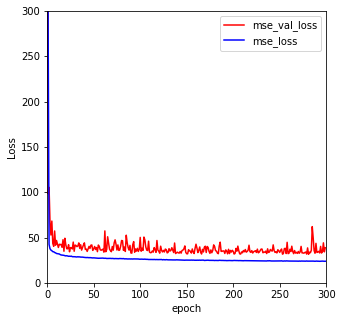

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_55 (Batc (None, 32)                128       
_________________________________________________________________
activation_55 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_56 (Batc (None, 32)                128       
_________________________________________________________________
activation_56 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/300
1319/1319 [==============================] - 8s 6ms/step - loss: 2979.4756 - val_loss: 1410.1434
Epoch 2/300
1319/1319 [==============================] - 8s 6ms/step - loss: 581.1311 - val_loss: 63.5254
Epoch 3/300
1319/1319 [==============================] - 8s 6ms/step - loss: 50.0507 - val_loss: 47.1776
Epoch 4/300
1319/1319 [==============================] - 8s 6ms/step - loss: 40.0025 - val_loss: 80.4839
Epoch 5/300
1319/1319 [==============================] - 8s 6ms/step - loss: 37.1075 - val_loss: 58.8378
Epoch 6/300
1319/1319 [==============================] - 8s 6ms/step - loss: 35.9770 - val_loss: 46.1241
Epoch 7/300
1319/1319 [==============================] - 8s 6ms/step - loss: 35.1416 - val_loss: 49.5976
Epoch 8/300
1319/1319 [==============================] - 8s 6ms/step - loss: 34.2729 - val_loss: 56.0687
Epoch 9/300
1319/1319 [==============================] - 8s 6ms/step - loss: 33.6953 - val_loss: 57.8835
Epoch 10/300
1319/1319 [==========================

1319/1319 [==============================] - 8s 6ms/step - loss: 26.0052 - val_loss: 35.5239
Epoch 79/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.9398 - val_loss: 32.5194
Epoch 80/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.7830 - val_loss: 39.3754
Epoch 81/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.7741 - val_loss: 38.7798
Epoch 82/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.8514 - val_loss: 43.1006
Epoch 83/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.8181 - val_loss: 33.8694
Epoch 84/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.6845 - val_loss: 32.4982
Epoch 85/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.7136 - val_loss: 36.9062
Epoch 86/300
1319/1319 [==============================] - 8s 6ms/step - loss: 25.6491 - val_loss: 38.1173
Epoch 87/300
1319/1319 [==============================] - 8

1319/1319 [==============================] - 8s 6ms/step - loss: 24.3890 - val_loss: 34.9361
Epoch 155/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.3660 - val_loss: 33.8815
Epoch 156/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.4230 - val_loss: 35.0530
Epoch 157/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.3841 - val_loss: 37.8171
Epoch 158/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.3069 - val_loss: 36.1962
Epoch 159/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.3655 - val_loss: 37.6263
Epoch 160/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.5191 - val_loss: 32.3250
Epoch 161/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.4311 - val_loss: 50.9092
Epoch 162/300
1319/1319 [==============================] - 8s 6ms/step - loss: 24.3178 - val_loss: 33.2833
Epoch 163/300
1319/1319 [==========================

1319/1319 [==============================] - 8s 6ms/step - loss: 23.7664 - val_loss: 38.5321
Epoch 231/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7824 - val_loss: 38.5580
Epoch 232/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7426 - val_loss: 37.3037
Epoch 233/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.8277 - val_loss: 33.3089
Epoch 234/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7458 - val_loss: 35.0350
Epoch 235/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7347 - val_loss: 33.3837
Epoch 236/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.8182 - val_loss: 38.7389
Epoch 237/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7578 - val_loss: 33.0859
Epoch 238/300
1319/1319 [==============================] - 8s 6ms/step - loss: 23.7404 - val_loss: 31.6445
Epoch 239/300
1319/1319 [==========================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.548610192275694 
MAE:  4.412462635192053 
SD:  5.742459750679213


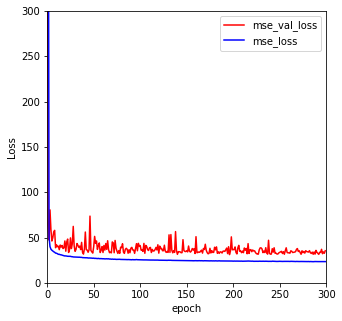

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.10465894440938772 
Ensemble_std:  5.69791425954935
